# 👋

# **OASIS INFOBYTE**

# **Data Science Internship**

# **Author: Ahmad Talha Ansari**

# **Email Spam Detection with Machine Learning**

## **Importing Necessary Libraries**

In [3]:
import string
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, ConfusionMatrixDisplay

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **Loading Dataset**

In [4]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## **Know Your Data...**

### Shape of data

In [5]:
rows, cols = df.shape
print(f"""
        No. of rows: {rows},
        No. of columns: {cols}
      """)


        No. of rows: 5572,
        No. of columns: 5
      


### A brief info of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Percentage of null values in dataset

In [7]:
(df.isnull().sum() / df.shape[0])*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

Need to remove following columns:
* Unnamed: 2
* Unnamed: 3
* Unnamed: 4

### Duplicate rows in dataset

In [8]:
df.duplicated( subset=["v1", "v2"]).sum()

403

## **Data Cleaning**

### Drop last three columns

In [9]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],
        inplace = True)

### Renaming columns

In [10]:
df.rename({"v1" : "target", "v2" : "text"},
          axis = 1, inplace = True)

### Dropping all duplicated rows

In [11]:
df.drop_duplicates(inplace=True)

### Label encode the target column

In [12]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

## **A Look on Cleaned Data**

### Shape of data

In [13]:
rows, cols = df.shape
print(f"""
        No. of rows: {rows},
        No. of columns: {cols}
      """)


        No. of rows: 5169,
        No. of columns: 2
      


### No. of null rows

In [14]:
df.isnull().sum()

target    0
text      0
dtype: int64

### No. of duplicated rows

In [15]:
df.duplicated().sum()

0

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## **Exploratory Data Analysis**

### Ratio of `ham` and `spam` messages in dataset

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

[]

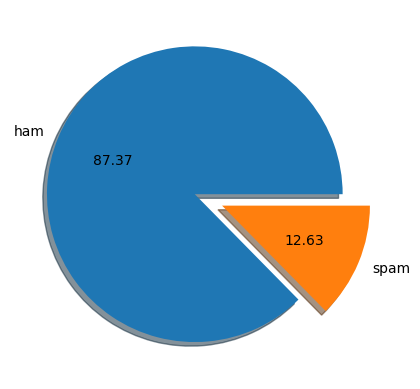

In [18]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct = "%0.2f",
        shadow=True, explode=[0, 0.2])
plt.plot()

* It is clear that the data is imbalanced.

### No. of characters in each row

In [19]:
df['num_characters'] = df['text'].apply(len)

### No. of words in each row

In [20]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

### No. of sentences in each row

In [21]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


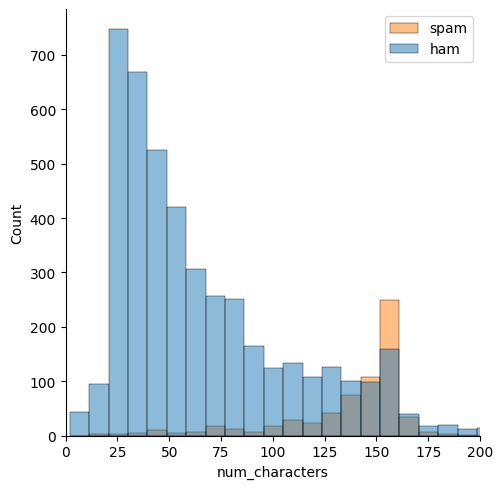

In [23]:
sns.displot(data = df, hue="target", x="num_characters",
            kind="hist", fill=True, legend=False)
plt.xlim(0, 200)
plt.legend(['spam', 'ham'])

### Multi-collinearity

<ipython-input-24-03585b41220d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:, 1:].corr(), annot=True)


<Axes: >

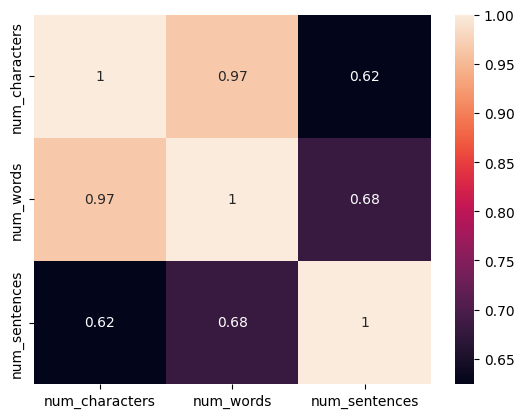

In [24]:
sns.heatmap(df.iloc[:, 1:].corr(), annot=True)

## **Data Preprocessing**

### Convert to lowercase

In [25]:
df["text"] = df["text"].apply(lambda x: x.lower())
df["text"].head(3)

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
Name: text, dtype: object

### Perform tokenization

In [26]:
df["transformed_text"] = df["text"].apply(lambda x: nltk.word_tokenize(x))

### Remove all non alphanumeric words

In [27]:
def remove_non_alphanumeric(text_list):
  clear_text_list = []
  for word in text_list:
    if word.isalnum():
      clear_text_list.append(word)
  return clear_text_list

In [28]:
df["transformed_text"] = df["transformed_text"].apply(lambda x: remove_non_alphanumeric(x))

### Remove stopwords and punctuation marks

In [29]:
def remove_stopword_punctuations(text_list):
  clear_text_list = []
  for word in text_list:
    if word not in stopwords.words('english') and word not in string.punctuation:
      clear_text_list.append(word)
  return clear_text_list

In [30]:
df["transformed_text"] = df["transformed_text"].apply(lambda x: remove_stopword_punctuations(x))

### Remove similar words

In [31]:
def remove_similar_words(text_list):
  clear_text_list = []
  ps = PorterStemmer()
  for word in text_list:
    clear_text_list.append(ps.stem(word))
  return " ".join(clear_text_list)

In [32]:
df["transformed_text"] = df["transformed_text"].apply(lambda x: remove_similar_words(x))

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"go until jurong point, crazy.. available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Thirty most frwquent words in `spam` messages

[]

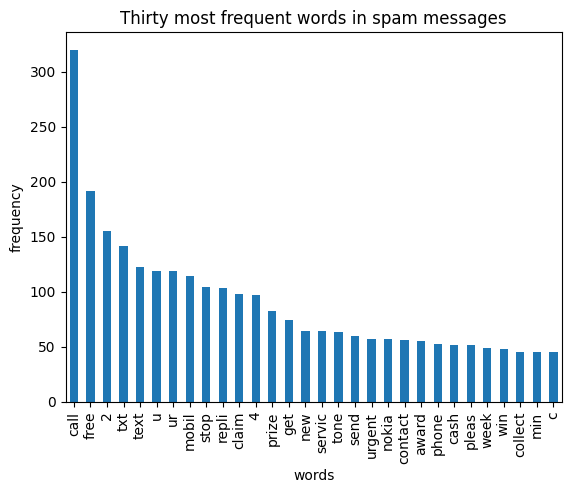

In [34]:
spam_text_list = df[df["target"] == 1]["transformed_text"].to_list()
temp_list = []
for text in spam_text_list:
  temp_list.extend(text.split(" "))
spam_text_list = pd.Series(temp_list)
spam_text_list.value_counts()[:30].plot(kind="bar", xlabel="words", ylabel="frequency",
                                       title = "Thirty most frequent words in spam messages")
plt.plot()

### Thirty most frwquent words in `ham` messages

[]

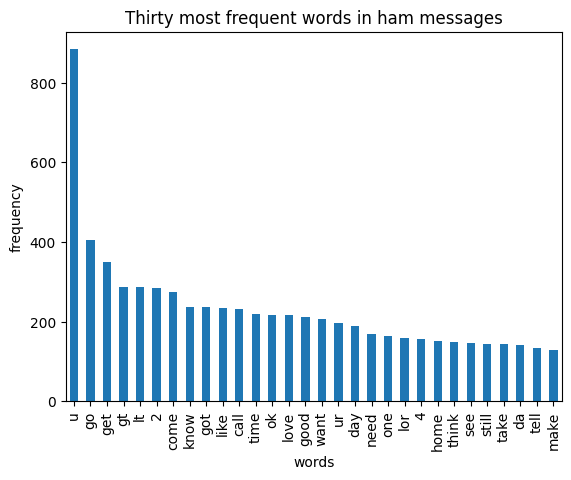

In [35]:
ham_text_list = df[df["target"] == 0]["transformed_text"].to_list()
temp_list = []
for text in ham_text_list:
  temp_list.extend(text.split(" "))
ham_text_list = pd.Series(temp_list)
ham_text_list.value_counts()[:30].plot(kind="bar", xlabel="words", ylabel="frequency",
                                       title = "Thirty most frequent words in ham messages")
plt.plot()

## **Model Building**

In [36]:
tfidf = TfidfVectorizer(max_features=3000)

### Splittin data into feature and target

In [37]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df["target"].values

### Splitting features and target into training and testing data

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Model Building

In [39]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

Accuracy score: 0.9709864603481625
Precision score: 1.0



Text(0.5, 1.0, 'Confusion Matrix')

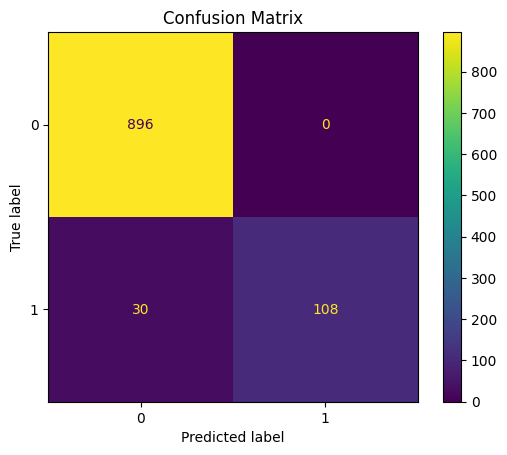

In [40]:
y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print("Accuracy score: {}".format(accuracy))
print("Precision score: {}".format(precision))
print()
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                       display_labels=mnb.classes_)
cm_disp.plot()
plt.title("Confusion Matrix")

# **Thank you ❣**